In [57]:
import matplotlib.pyplot as plt

uber = pd.read_csv("uber_cleaned.csv")
lyft = pd.read_csv("lyft_cleaned.csv")
uber['Rating_Scaled'] = (uber['Rating'] - 3) / 2
lyft['Rating_Scaled'] = (uber['Rating'] - 3) / 2
pd.options.display.max_colwidth = 500


uber['Date of Experience']

0       2023-02-16
1       2023-02-16
2       2023-02-17
3       2023-02-14
4       2023-02-15
           ...    
3766    2021-01-01
3767    2021-01-01
3768    2020-12-31
3769    2020-12-31
3770    2020-12-31
Name: Date of Experience, Length: 3771, dtype: object

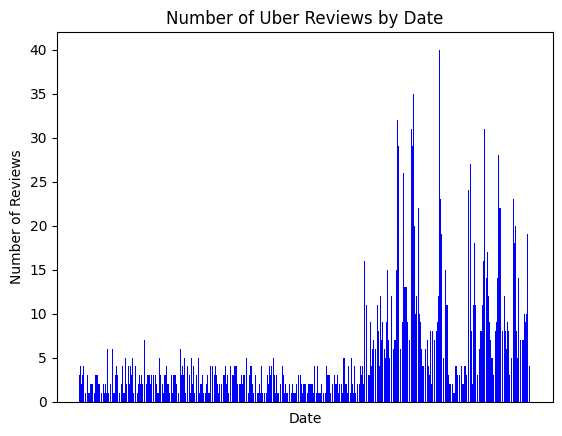

In [58]:
reviews_by_date = uber.groupby('Date of Experience').size()
plt.bar(reviews_by_date.index, reviews_by_date.values, color='blue')
plt.title('Number of Uber Reviews by Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks([], [])
plt.show()

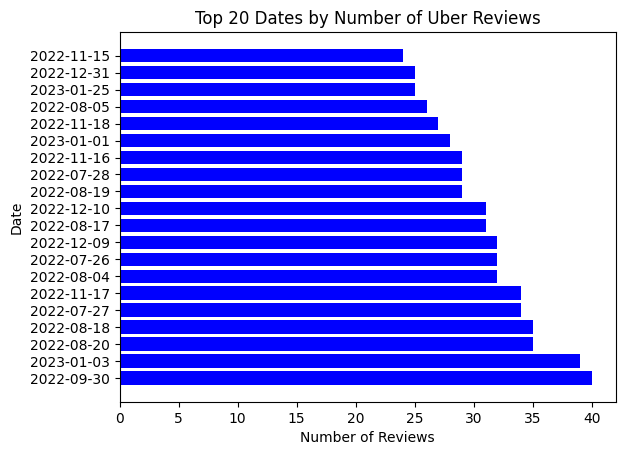

In [59]:
reviews_by_date = uber.groupby('Date of Experience').size()
reviews_by_date = reviews_by_date.sort_values(ascending=False)
top_20_dates = reviews_by_date.nlargest(20)

plt.barh(top_20_dates.index, top_20_dates.values, color='blue')
plt.title('Top 20 Dates by Number of Uber Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Date')
plt.show()

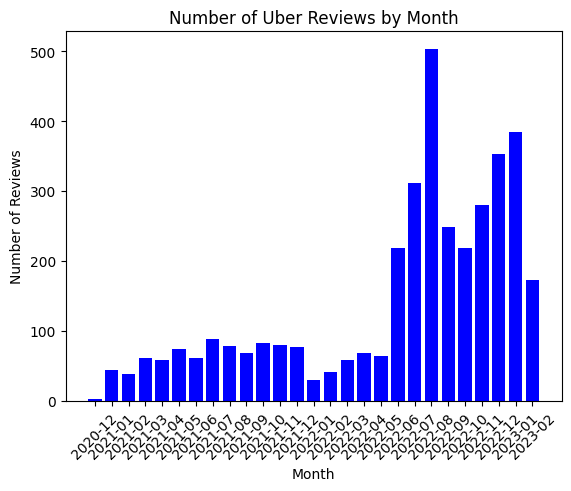

In [60]:
uber['Date of Experience'] = pd.to_datetime(uber['Date of Experience'])
reviews_by_month = uber.groupby(uber['Date of Experience'].dt.strftime('%Y-%m')).size()

plt.bar(reviews_by_month.index, reviews_by_month.values, color='blue')
plt.title('Number of Uber Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


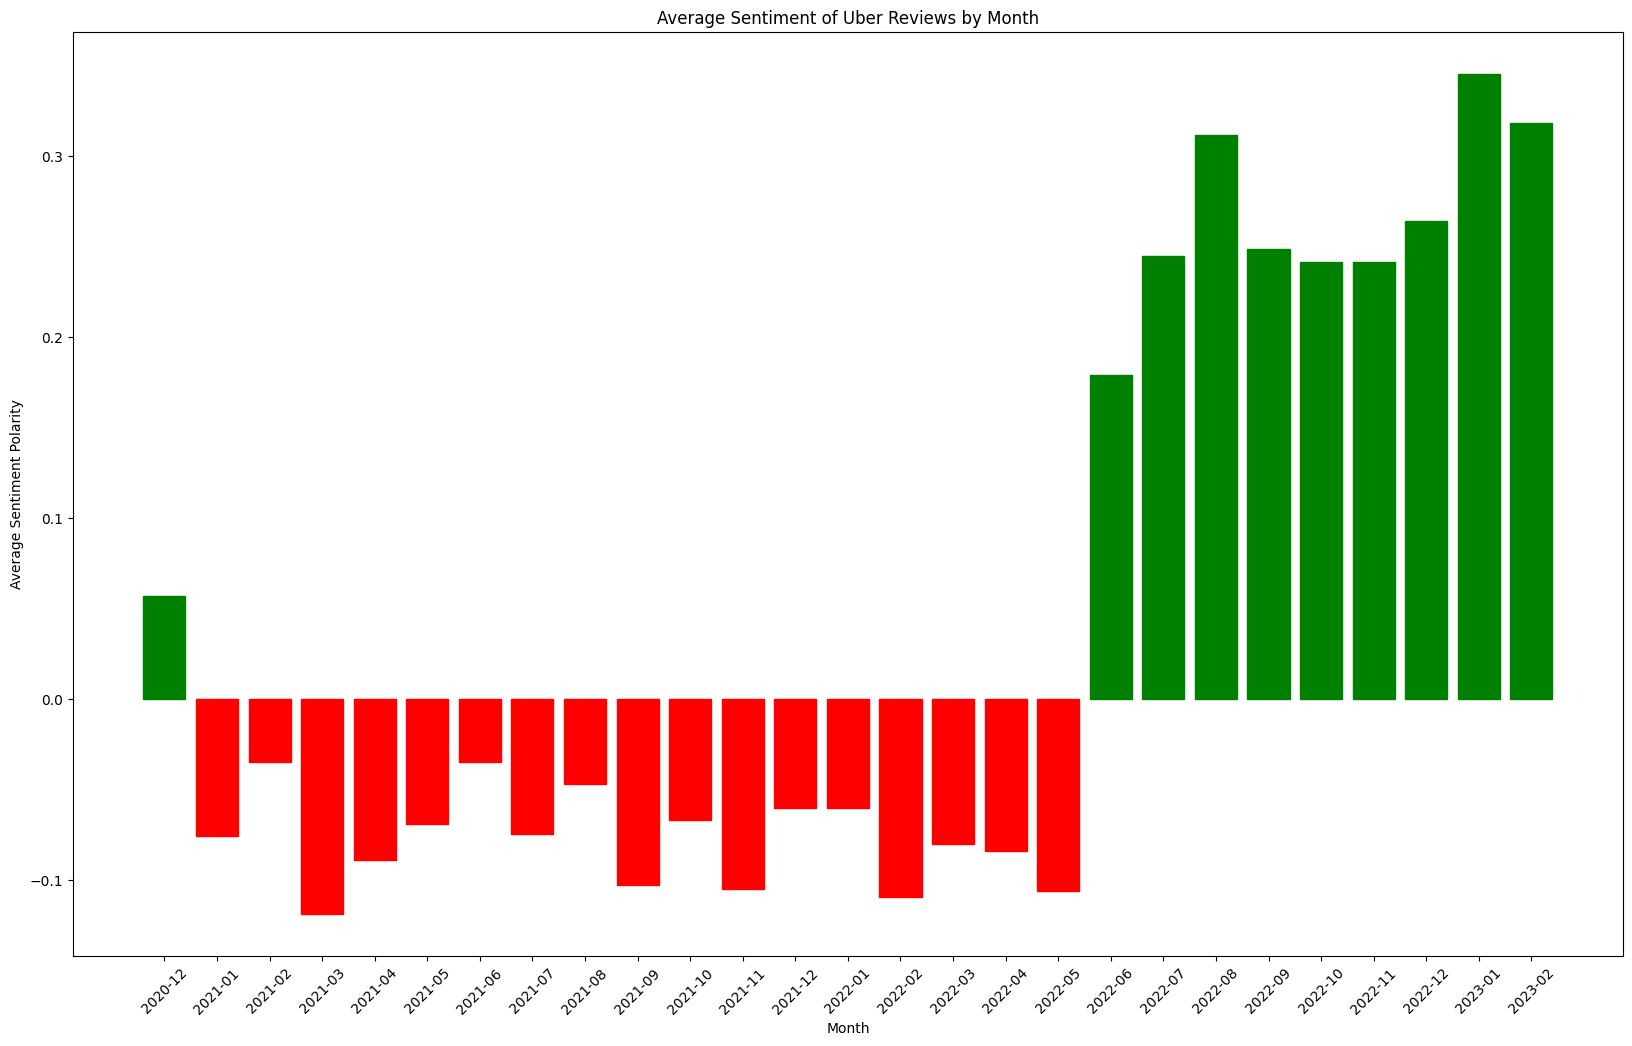

In [61]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

uber['Date of Experience'] = pd.to_datetime(uber['Date of Experience'])

monthly_sentiment = {}
for index, row in uber.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    month = date.strftime('%Y-%m')
    if month not in monthly_sentiment:
        monthly_sentiment[month] = {'polarity_sum': polarity, 'count': 1}
    else:
        monthly_sentiment[month]['polarity_sum'] += polarity
        monthly_sentiment[month]['count'] += 1

average_sentiment = {}
for month, values in monthly_sentiment.items():
    average_sentiment[month] = values['polarity_sum'] / values['count']

# Sort the months in sequential order
sorted_months = sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x))

# Plot the average sentiment polarity per month
plt.figure(figsize=(20, 12))
bars = plt.bar(sorted_months, [average_sentiment[m] for m in sorted_months], align='center')
for bar, value in zip(bars, [average_sentiment[m] for m in sorted_months]):
    if value >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')
plt.title("Average Sentiment of Uber Reviews by Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


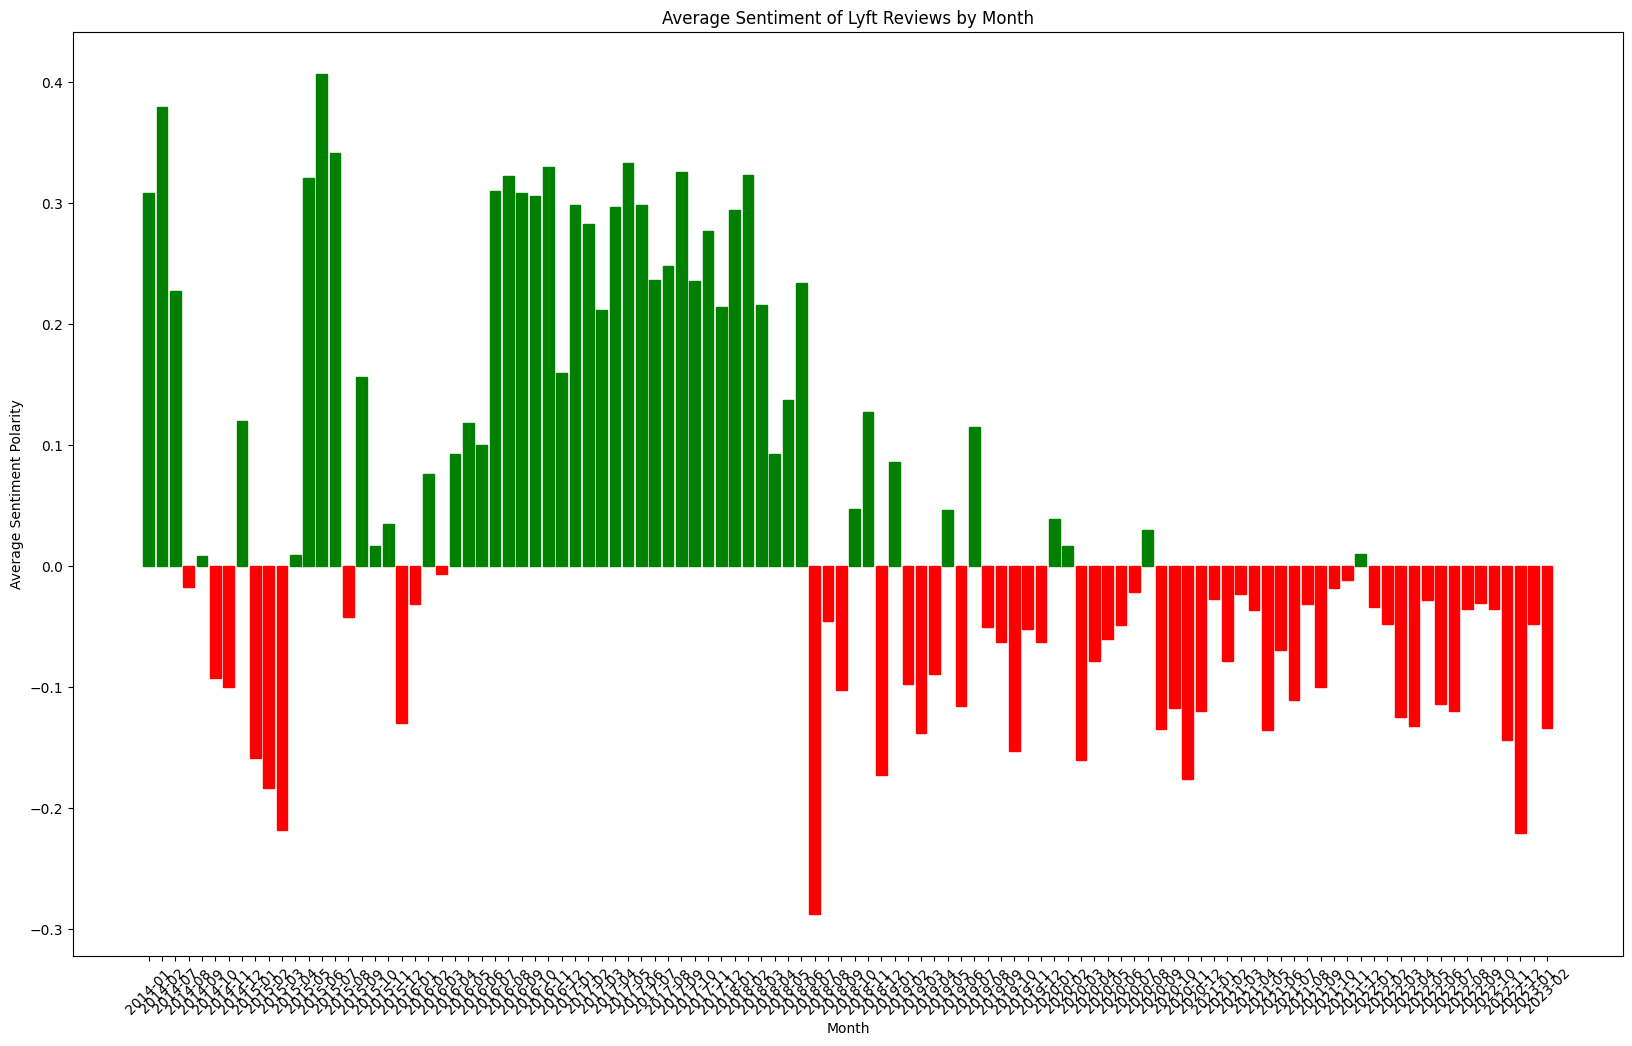

In [62]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

lyft['Date of Experience'] = pd.to_datetime(lyft['Date of Experience'])

monthly_sentiment = {}
for index, row in lyft.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    month = date.strftime('%Y-%m')
    if month not in monthly_sentiment:
        monthly_sentiment[month] = {'polarity_sum': polarity, 'count': 1}
    else:
        monthly_sentiment[month]['polarity_sum'] += polarity
        monthly_sentiment[month]['count'] += 1

average_sentiment = {}
for month, values in monthly_sentiment.items():
    average_sentiment[month] = values['polarity_sum'] / values['count']

# Sort the months in sequential order
sorted_months = sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x))

# Plot the average sentiment polarity per month
plt.figure(figsize=(20, 12))
bars = plt.bar(sorted_months, [average_sentiment[m] for m in sorted_months], align='center')
for bar, value in zip(bars, [average_sentiment[m] for m in sorted_months]):
    if value >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')
plt.title("Average Sentiment of Lyft Reviews by Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


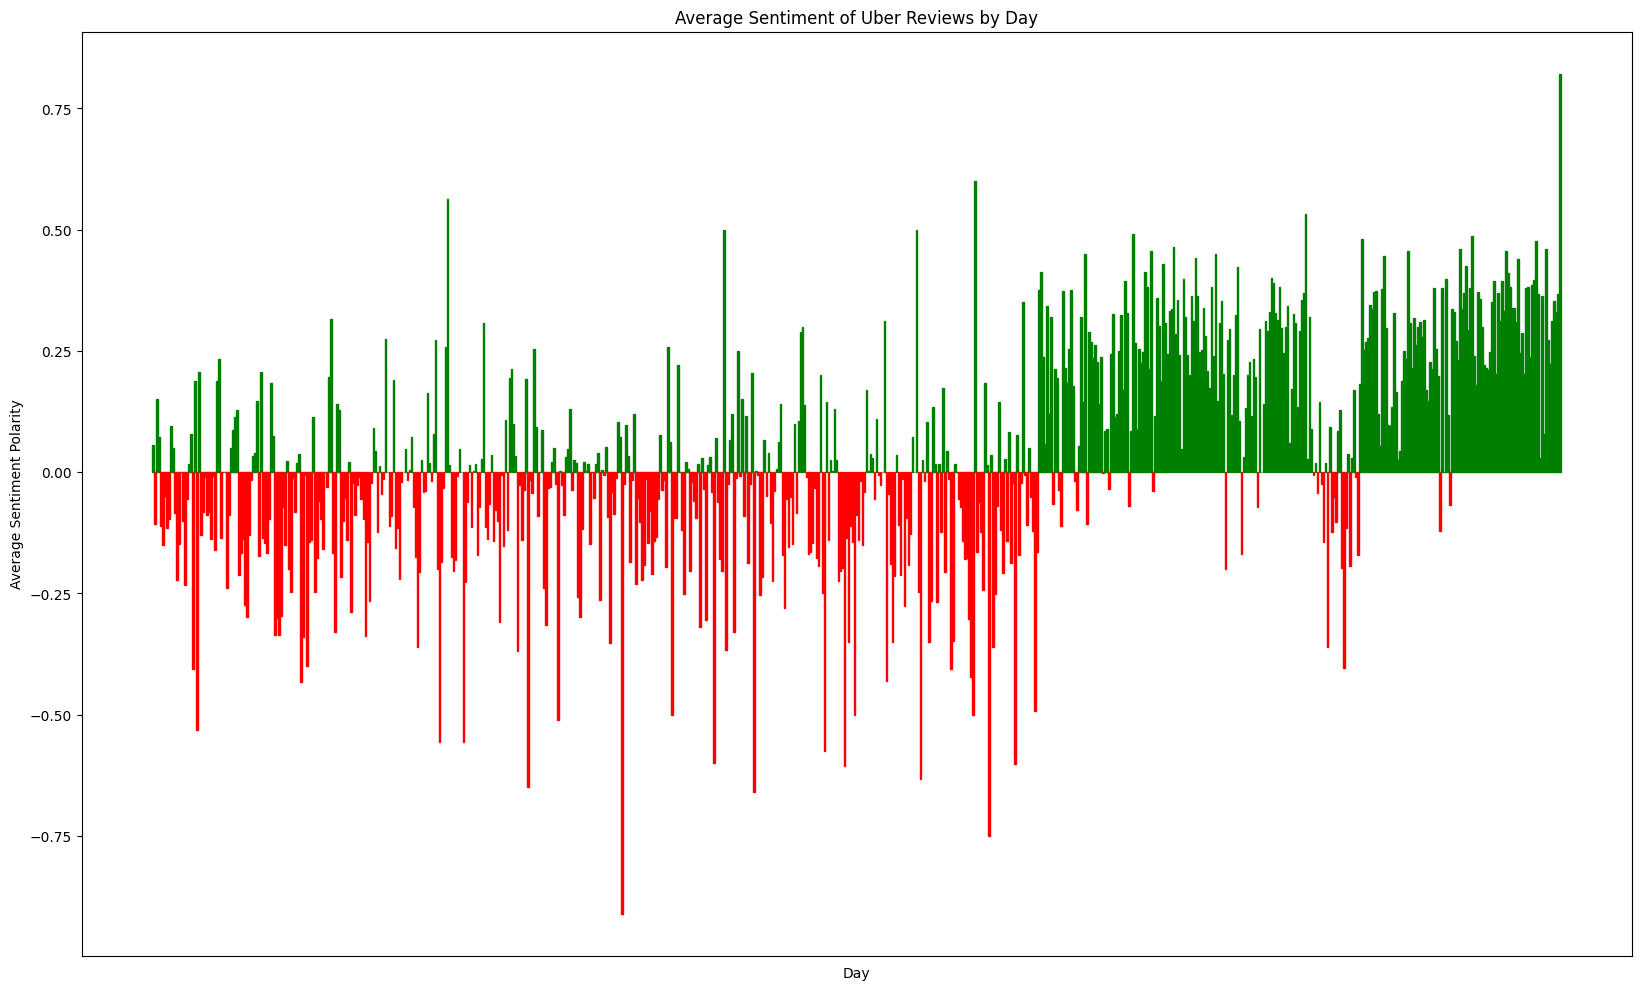

In [63]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

uber['Date of Experience'] = pd.to_datetime(uber['Date of Experience'])

daily_sentiment = {}
for index, row in uber.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    day = date.strftime('%Y-%m-%d')
    if day not in daily_sentiment:
        daily_sentiment[day] = {'polarity_sum': polarity, 'count': 1}
    else:
        daily_sentiment[day]['polarity_sum'] += polarity
        daily_sentiment[day]['count'] += 1

average_sentiment = {}
for day, values in daily_sentiment.items():
    average_sentiment[day] = values['polarity_sum'] / values['count']

# Sort the days in sequential order
sorted_days = sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x))

# Plot the average sentiment polarity per day
plt.figure(figsize=(20, 12))
bars = plt.bar(sorted_days, [average_sentiment[d] for d in sorted_days], align='center')
for bar, value in zip(bars, [average_sentiment[d] for d in sorted_days]):
    if value >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')
plt.title("Average Sentiment of Uber Reviews by Day")
plt.xlabel("Day")
plt.ylabel("Average Sentiment Polarity")
plt.xticks([], [])
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


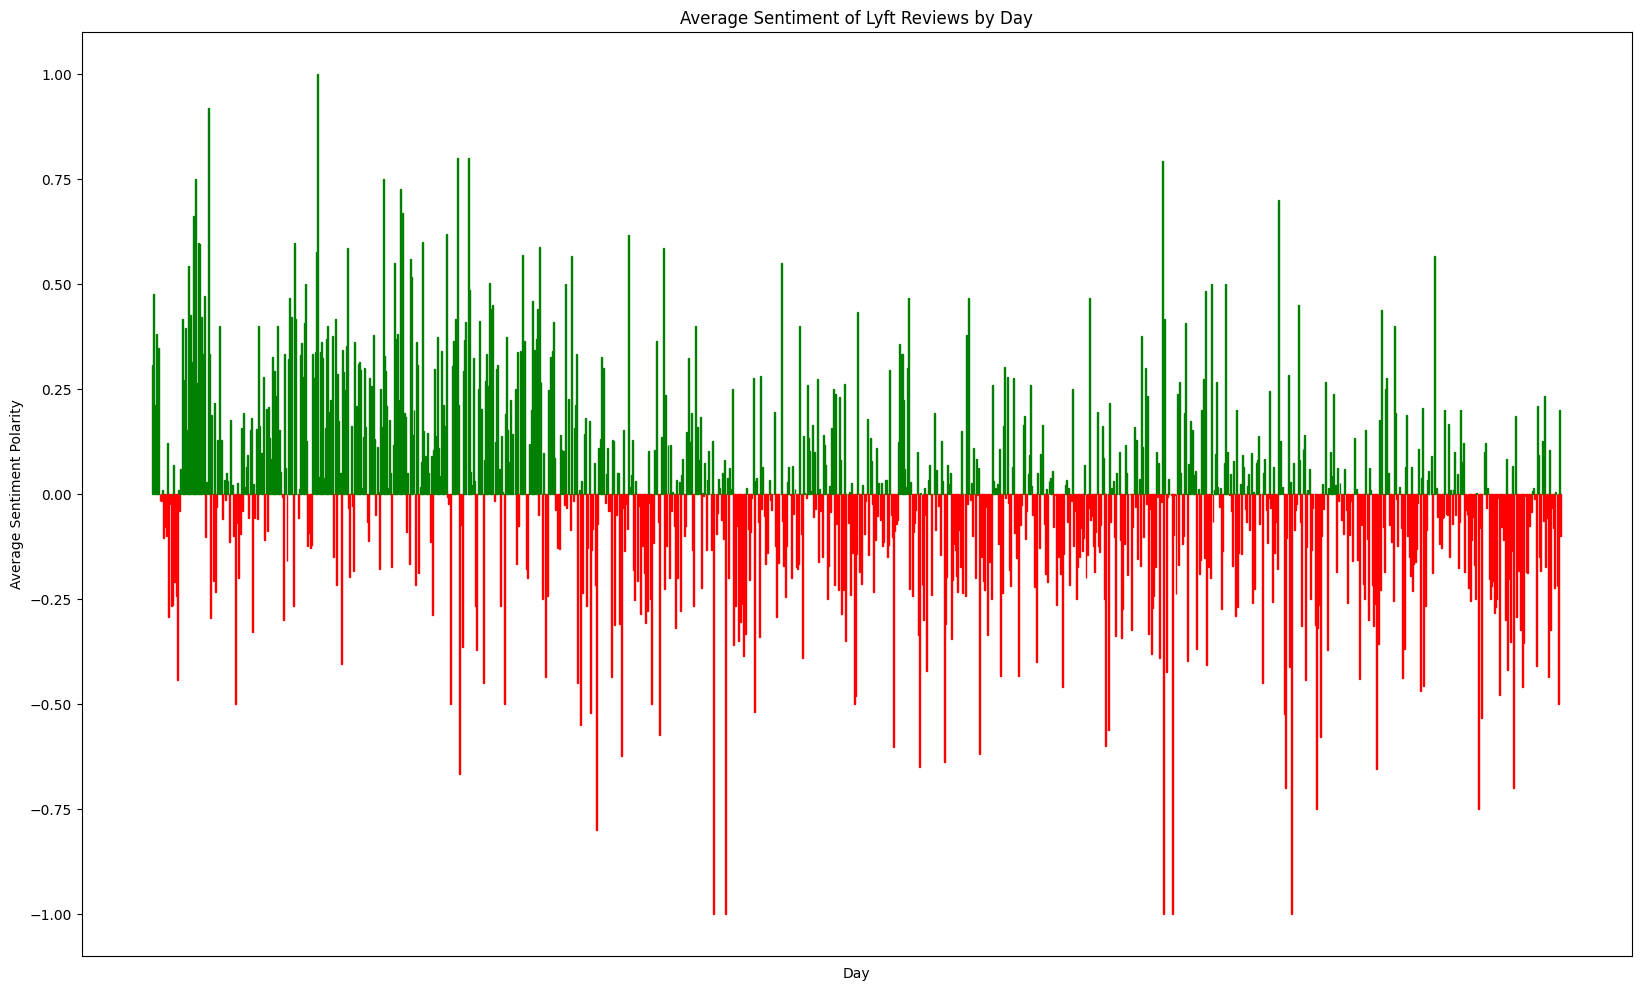

In [64]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

lyft['Date of Experience'] = pd.to_datetime(lyft['Date of Experience'])

daily_sentiment = {}
for index, row in lyft.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    day = date.strftime('%Y-%m-%d')
    if day not in daily_sentiment:
        daily_sentiment[day] = {'polarity_sum': polarity, 'count': 1}
    else:
        daily_sentiment[day]['polarity_sum'] += polarity
        daily_sentiment[day]['count'] += 1

average_sentiment = {}
for day, values in daily_sentiment.items():
    average_sentiment[day] = values['polarity_sum'] / values['count']

# Sort the days in sequential order
sorted_days = sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x))

# Plot the average sentiment polarity per day
plt.figure(figsize=(20, 12))
bars = plt.bar(sorted_days, [average_sentiment[d] for d in sorted_days], align='center')
for bar, value in zip(bars, [average_sentiment[d] for d in sorted_days]):
    if value >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')
plt.title("Average Sentiment of Lyft Reviews by Day")
plt.xlabel("Day")
plt.ylabel("Average Sentiment Polarity")
plt.xticks([], [])
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


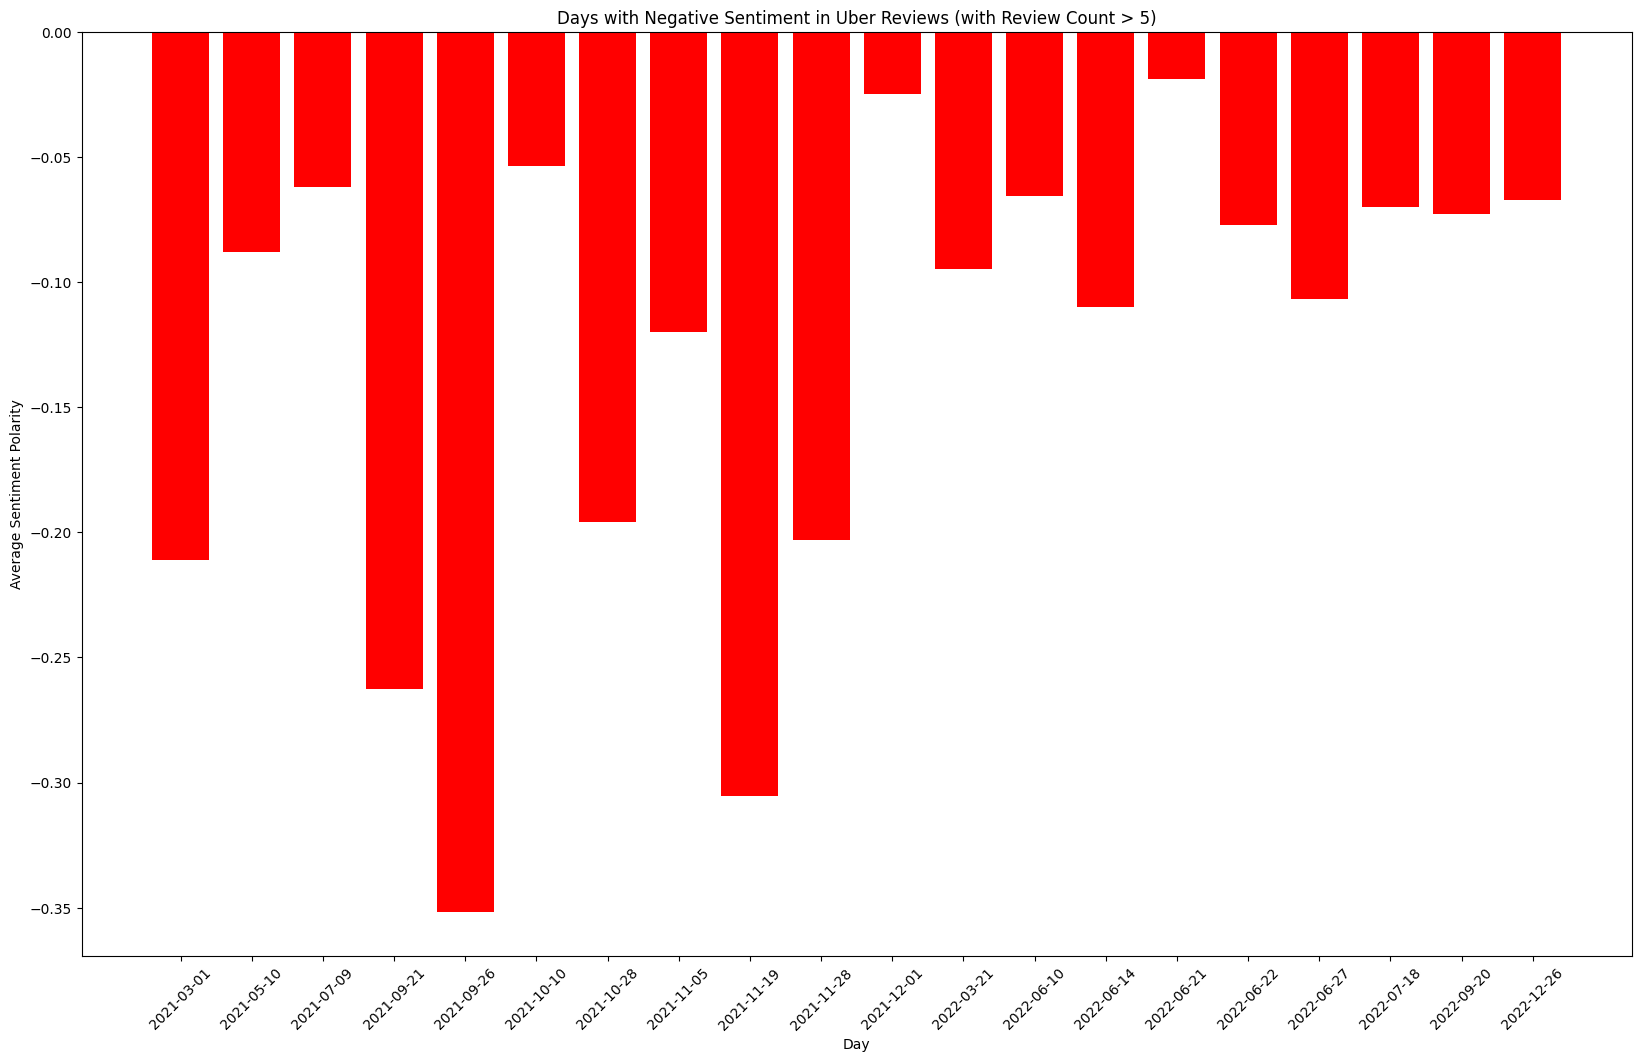

In [65]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

uber['Date of Experience'] = pd.to_datetime(uber['Date of Experience'])

daily_sentiment = {}
for index, row in uber.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    day = date.strftime('%Y-%m-%d')
    if day not in daily_sentiment:
        daily_sentiment[day] = {'polarity_sum': polarity, 'count': 1}
    else:
        daily_sentiment[day]['polarity_sum'] += polarity
        daily_sentiment[day]['count'] += 1

average_sentiment = {}
for day, values in daily_sentiment.items():
    average_sentiment[day] = values['polarity_sum'] / values['count']

# Sort the days in sequential order and filter out days with count <= 5
sorted_days = [d for d in sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x)) if daily_sentiment[d]['count'] > 5]

# Find the days with negative sentiment
negative_days = [d for d in sorted_days if average_sentiment[d] < 0]

# Plot the average sentiment polarity per day, highlighting only the negative bars
plt.figure(figsize=(20, 12))
for d in negative_days:
    plt.bar(d, average_sentiment[d], color='red')
plt.title("Days with Negative Sentiment in Uber Reviews (with Review Count > 5)")
plt.xlabel("Day")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


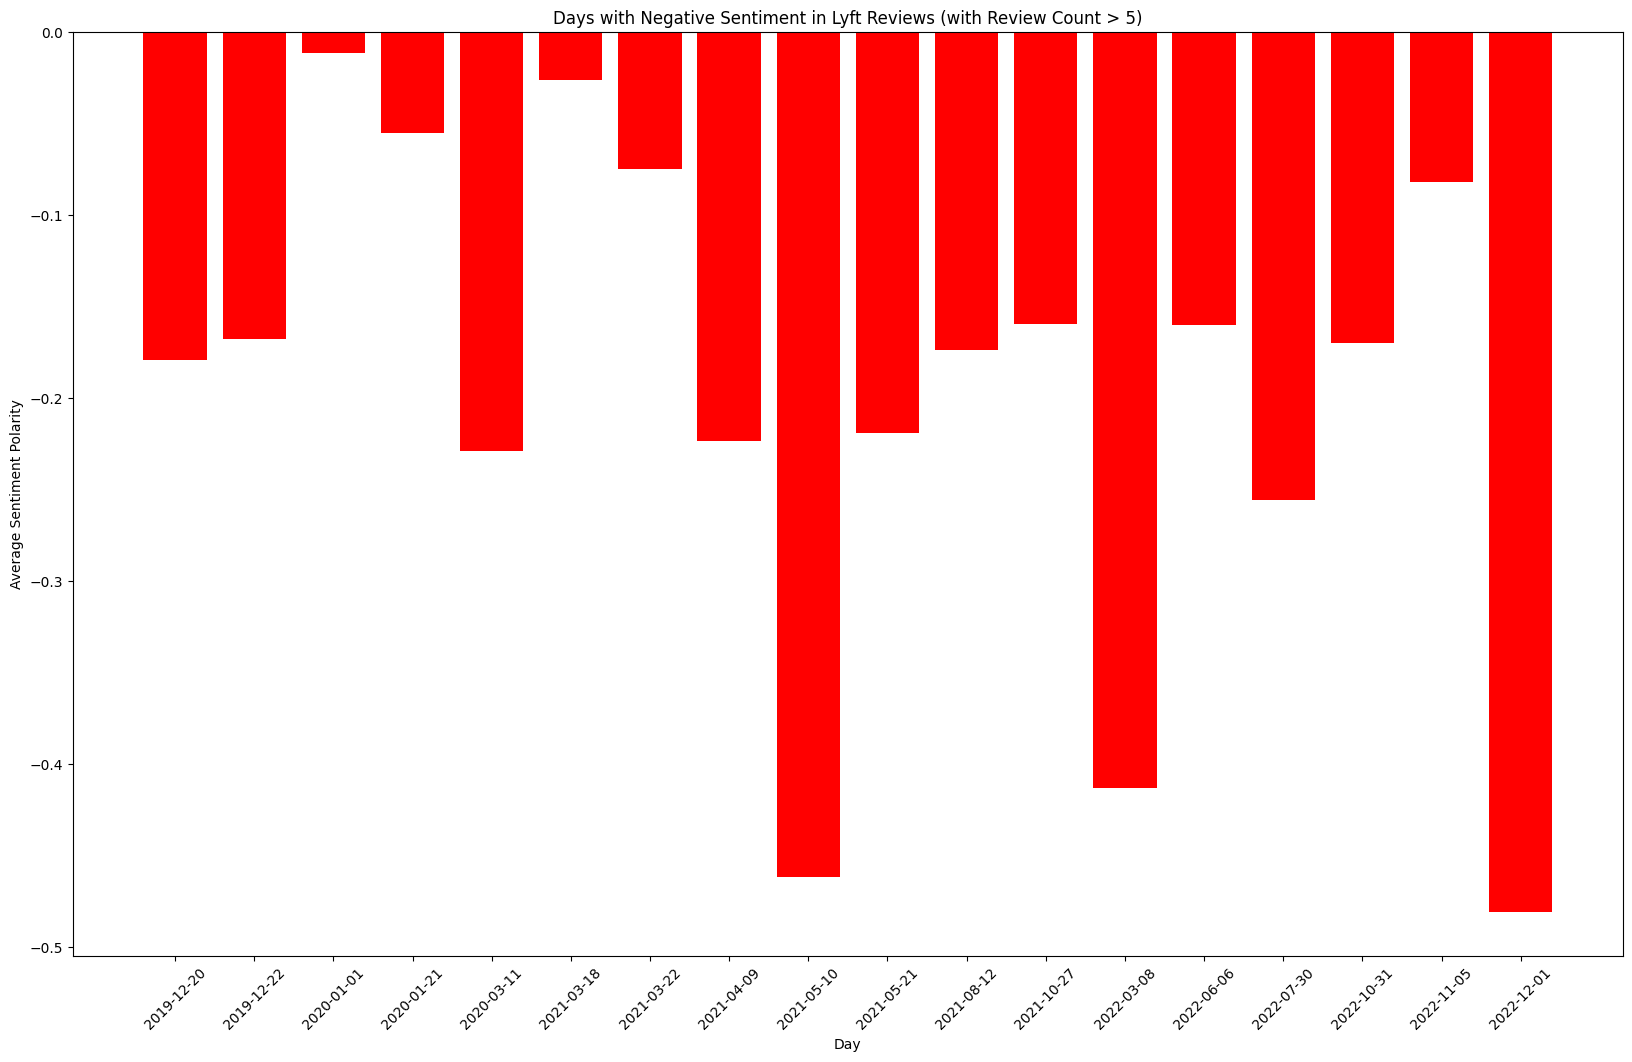

In [70]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

lyft['Date of Experience'] = pd.to_datetime(lyft['Date of Experience'])

daily_sentiment = {}
for index, row in lyft.iterrows():
    review = row['Review Body']
    date = row['Date of Experience']
    review = review.translate(translator)
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    day = date.strftime('%Y-%m-%d')
    if day not in daily_sentiment:
        daily_sentiment[day] = {'polarity_sum': polarity, 'count': 1}
    else:
        daily_sentiment[day]['polarity_sum'] += polarity
        daily_sentiment[day]['count'] += 1

average_sentiment = {}
for day, values in daily_sentiment.items():
    average_sentiment[day] = values['polarity_sum'] / values['count']

# Sort the days in sequential order and filter out days with count <= 5
sorted_days = [d for d in sorted(average_sentiment.keys(), key=lambda x: pd.to_datetime(x)) if daily_sentiment[d]['count'] > 3]

# Find the days with negative sentiment
negative_days = [d for d in sorted_days if average_sentiment[d] < 0]

# Plot the average sentiment polarity per day, highlighting only the negative bars
plt.figure(figsize=(20, 12))
for d in negative_days:
    plt.bar(d, average_sentiment[d], color='red')
plt.title("Days with Negative Sentiment in Lyft Reviews (with Review Count > 5)")
plt.xlabel("Day")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()